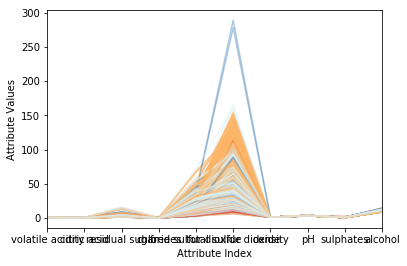

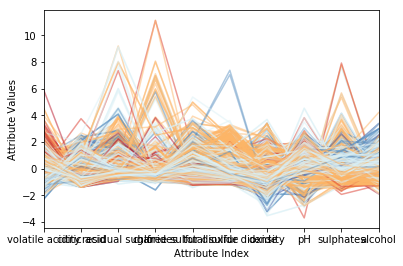

In [3]:
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot
from math import exp

target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(target_url,header=0, sep=";")

#generate statistical summaries
summary = wine.describe()
nrows = len(wine.index)
tasteCol = len(summary.columns)
meanTaste = summary.iloc[1,tasteCol - 1]
sdTaste = summary.iloc[2,tasteCol - 1]
nDataCol = len(wine.columns) - 1

for i in range(nrows):
    #plot rows of data as if they were series data
    dataRow = wine.iloc[i,1:nDataCol]
    normTarget = (wine.iloc[i,nDataCol] - meanTaste)/sdTaste
    labelColor = 1.0/(1.0 + exp(-normTarget))
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)
    
plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()

wineNormalized = wine
ncols = len(wineNormalized.columns)

for i in range(ncols):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    wineNormalized.iloc[:,i:(i + 1)] = (wineNormalized.iloc[:,i:(i + 1)] - mean) / sd

#Try again with normalized values
for i in range(nrows):
    #plot rows of data as if they were series data
    dataRow = wineNormalized.iloc[i,1:nDataCol]
    normTarget = wineNormalized.iloc[i,nDataCol]
    labelColor = 1.0/(1.0 + exp(-normTarget))
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()